In [1]:
# import numpy as np
# a=[1,2,3,4,5,6,7]
# a.remove(7)
# print(a)
# print(np.inf==np.inf)

C:\Users\acer-pc\anaconda3\envs\pytorch310\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


    Element_1  Element_2  cluster
0    3.745401   9.507143        2
1    6.118529   1.394939        1
2    1.220382   4.951769        1
3    3.886773   2.713490        1
4    8.631034   6.232981        0
..        ...        ...      ...
95   5.542265   0.052296        0
96   6.956181   0.032183        0
97   0.585509   3.342383        1
98   1.183362   4.099049        2
99   1.861014   8.026433        1

[100 rows x 3 columns]


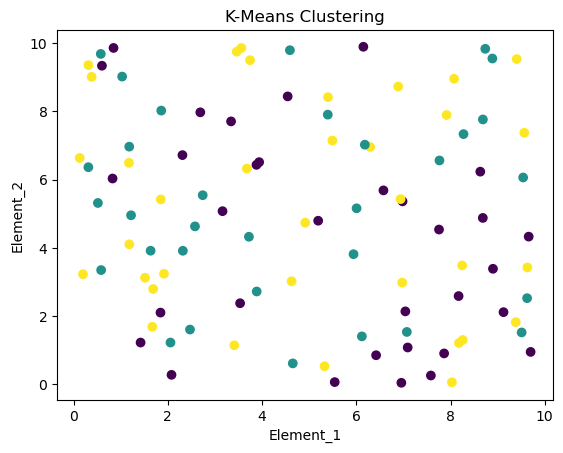

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate a sample dataset, here we use random data
np.random.seed(42)
num_samples = 100
num_features = 20

data = np.random.rand(num_samples, num_features) * 10

# Convert the data to a DataFrame
columns = [f'Element_{i+1}' for i in range(num_features)]
df = pd.DataFrame(data, columns=columns)

# Use K-Means clustering
num_clusters = 3  # Set the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(df)

# Print the cluster each sample belongs to
print(df[['Element_1', 'Element_2', 'cluster']])

# Plot the clustering results (here we only select the first two features for visualization)
plt.scatter(df['Element_1'], df['Element_2'], c=df['cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Element_1')
plt.ylabel('Element_2')
plt.show()

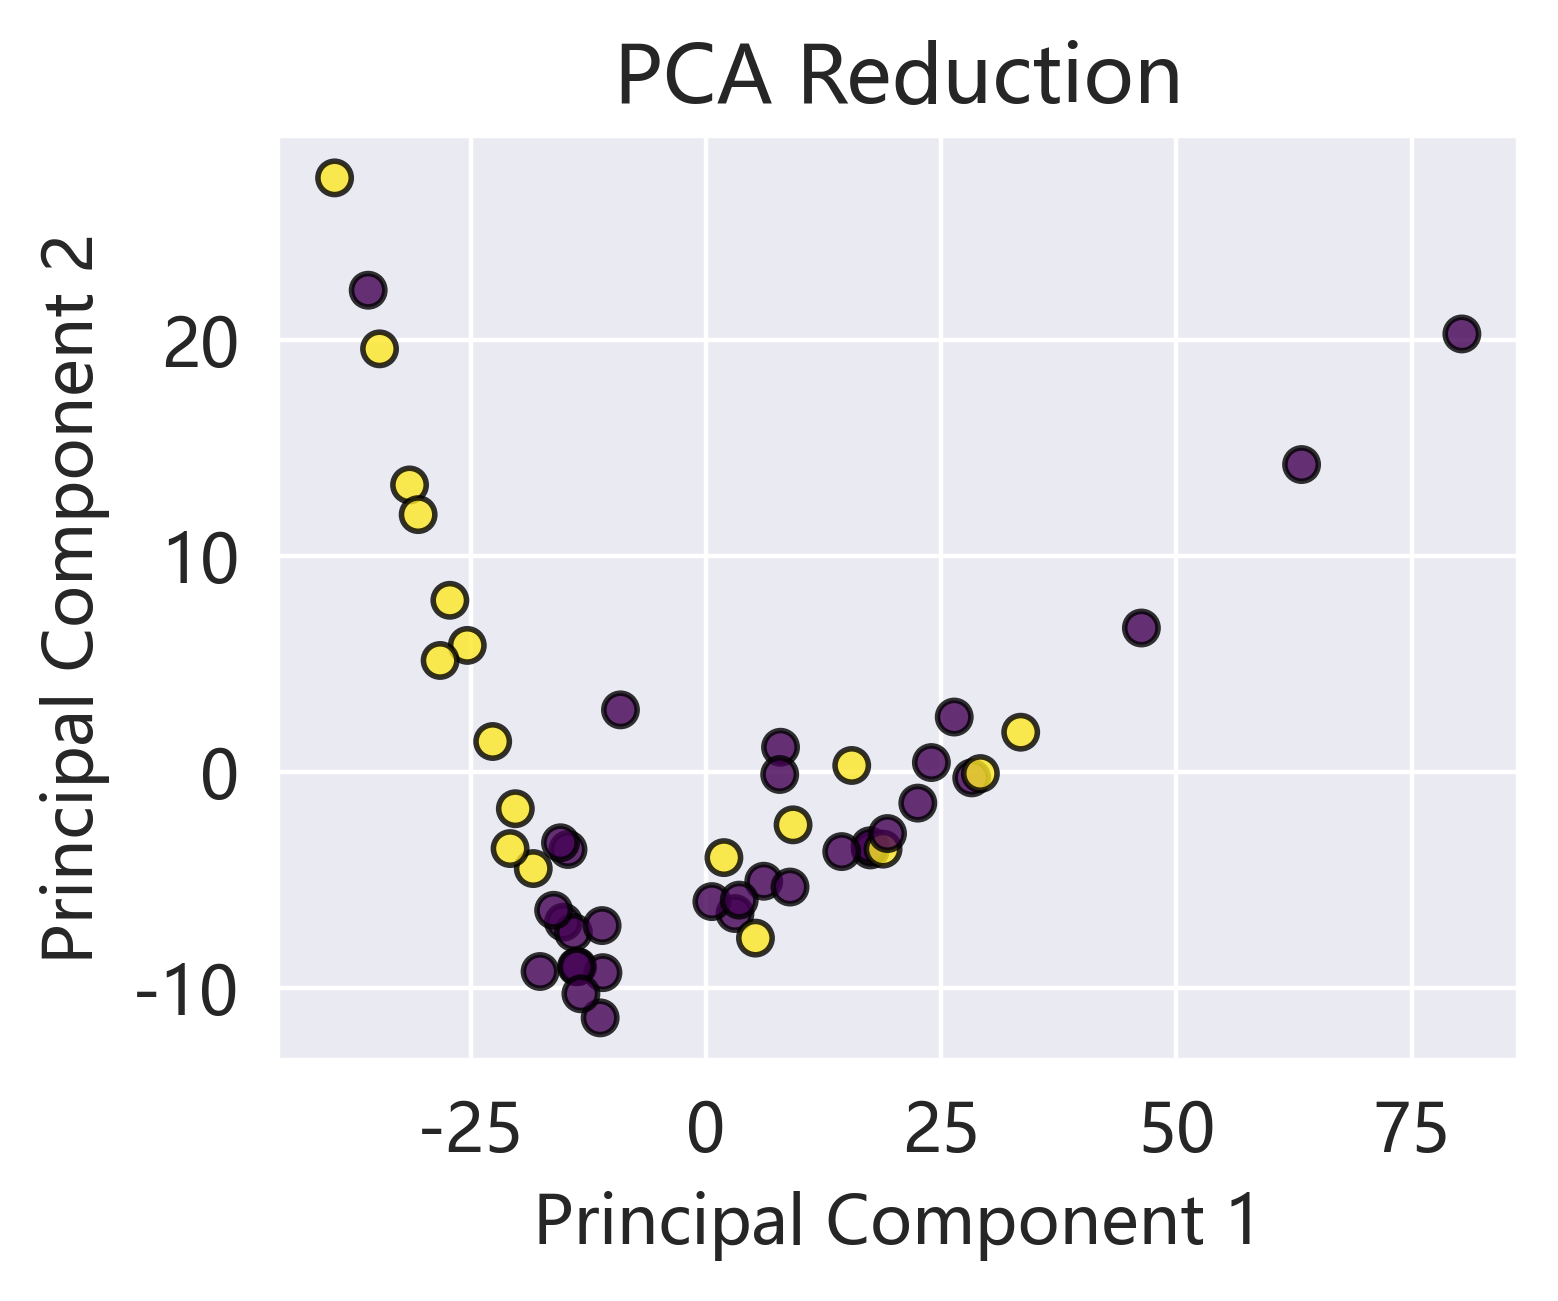

t-SNE_component1:
-3.4261498
-8.865953
4.020774
-3.8736093
-3.7569184
4.096464
3.9083579
4.040617
3.0301423
-5.777065
-3.897216
-5.756789
4.841983
3.6691127
-7.3607125
-4.8921
7.5063906
-6.543797
-5.2472305
4.1623645
7.3902526
5.3020883
8.046202
-5.8751993
-3.6843932
5.881137
6.994749
3.3462455
-4.2599945
4.3897967
-3.1522448
-8.223086
3.4291103
3.93095
-4.6930056
3.410237
6.7223725
-7.1096683
6.77214
-3.5070388
-7.596872
-6.1635575
-6.7837024
7.9205327
-7.0718784
-8.7317705
3.1385303
5.2508397
-5.7469316
8.2494135
t-SNE_component2:
1.5305122
4.568948
-3.6716986
1.8584172
0.9251898
-3.3007135
-5.4548182
-4.37968
-2.8480666
2.9738169
1.3063382
2.9740298
-4.128147
-3.215838
3.365999
1.4672549
-5.8064384
3.283162
2.7291803
-4.360489
-5.7460136
-4.594874
-6.1218166
3.4833584
2.9252264
-4.8939223
-5.585913
-3.9806771
2.1421409
-3.6833105
1.2621734
4.2697535
-2.7663643
-2.8315225
1.8278021
-3.4897006
-5.469889
3.693292
-5.1733265
1.60031
3.932443
2.9800825
3.314806
-6.035559
4.1357713
4.5064

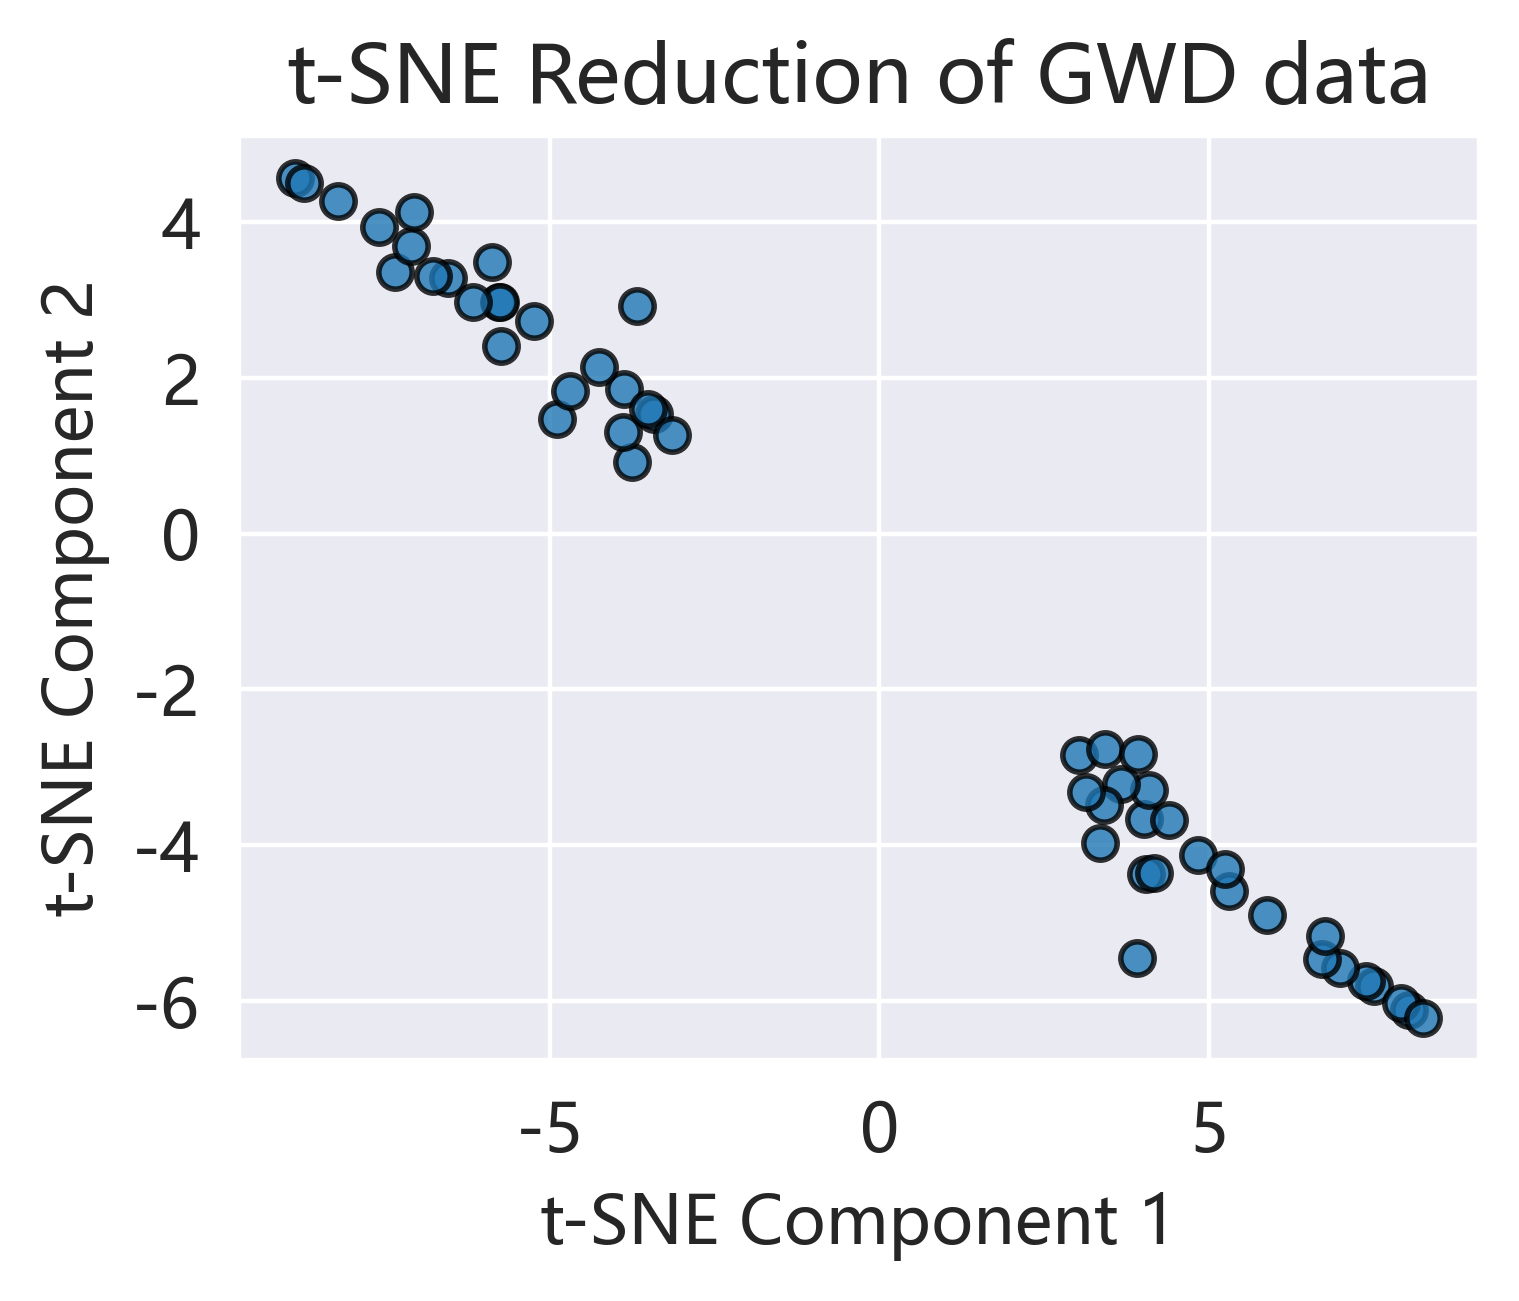

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.ensemble import  RandomForestClassifier
import pydotplus
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error,accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import warnings  
warnings.filterwarnings('ignore')
import joblib
import os 
import shutil
from glob import glob
from openpyxl import load_workbook
plt.rcParams['font.sans-serif']=['Microsoft YaHei']  # Font set for Chinese characters
plt.rcParams['font.size'] = 12  # Font size
plt.rcParams['axes.unicode_minus'] = False

data_excel='predict.xlsx'
data_name='GWD'  # Which sheet of the Excel file to use for the dataset, the sheet should be in the form of data_XX, XX is data_name
label_name='GWD' # Name of the dataset label
sheet_name=f'{data_name}_data'
data=pd.read_excel(data_excel,sheet_name=sheet_name)
data=data.fillna(0)

size_threshold=0.8


y=np.array([1 if x>size_threshold else 0 for x in data[label_name]])  # Divide the original GWD into two categories based on the threshold, where 0 represents smaller values and 1 represents larger values
## print(data_target.items)
# print('Threshold value is', size_threshold)
# print(type(data_target))
# print(data_target.value_counts())
# print(data[label_name])
# print(type(data_target))

feature_names=['cC','cO','cN','cF','cP','cS','OCr','FCr','FOr','PCr','NCr',
               'SCr','NFr','POr','NOr','SOr','PFr','SFr','SPr','NSr','FNS/Or',
               'FP/Or','FNS/FPr']

data_features_part=data[feature_names]

import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Generate example data
X=data_features_part
# Instantiate PCA model, specify the dimension to reduce to
pca = PCA(n_components=2)

# Fit and transform the data
X_pca = pca.fit_transform(X)

# Visualize the dimensionality reduction results
plt.figure(figsize=(4, 3),dpi=400)

plt.scatter(X_pca[:, 0], X_pca[:, 1],c=y, cmap='viridis', edgecolors='k', alpha=0.8)
plt.title('PCA Reduction')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.savefig('GWD——results PCA.jpg')
plt.show()

plt.figure(figsize=(4, 3),dpi=400)
tsne = TSNE(n_components=2, random_state=42,perplexity=15,method='exact')
X_tsne = tsne.fit_transform(X)

scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], cmap='viridis', edgecolors='k', alpha=0.8)
plt.title('t-SNE Reduction of GWD data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.savefig('GWD——results tSNE.jpg')
def show_every_data(ls):
    for i in ls:
        print(i)
    return 
# print('t-SNE_component1:')
# show_every_data(X_tsne[:,0])
# print('t-SNE_component2:')
# show_every_data(X_tsne[:,1])


# Add a color bar
# legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
# plt.gca().add_artist(legend1)

plt.show()

y.shape 31 
 y[0].shape <class 'numpy.int32'> [0 1 0 1 1 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 0 0 1 1 0 1 1 0 1]


C:\Users\acer-pc\AppData\Local\Temp\ipykernel_11044\1709409763.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], cmap='viridis', edgecolors='k', alpha=0.8,s=20)


t-SNE_component1:
-10.980717
-15.452276
-4.3321943
8.977555
28.27023
-19.048801
27.283264
-55.745102
12.303503
-20.77003
45.22536
-4.1543503
29.473316
11.119281
-18.88085
-4.8150916
-36.322704
-26.992857
-21.615961
-3.6710148
7.639444
45.683178
11.907741
-35.739887
7.938351
25.798044
-39.00597
28.129446
-40.788162
47.288906
-48.65328
t-SNE_component2:
-35.182915
-53.89847
16.480526
-31.165377
-3.7937064
48.657944
38.894375
3.0197704
25.881882
8.5914955
24.978327
34.69753
-42.160484
-11.181332
-8.7326565
-18.78624
-4.687284
-24.06693
26.870905
-0.67569697
-50.962452
-20.427992
6.9875035
-41.48872
50.419357
-22.446598
15.39328
15.17127
35.823288
2.084124
-21.21962


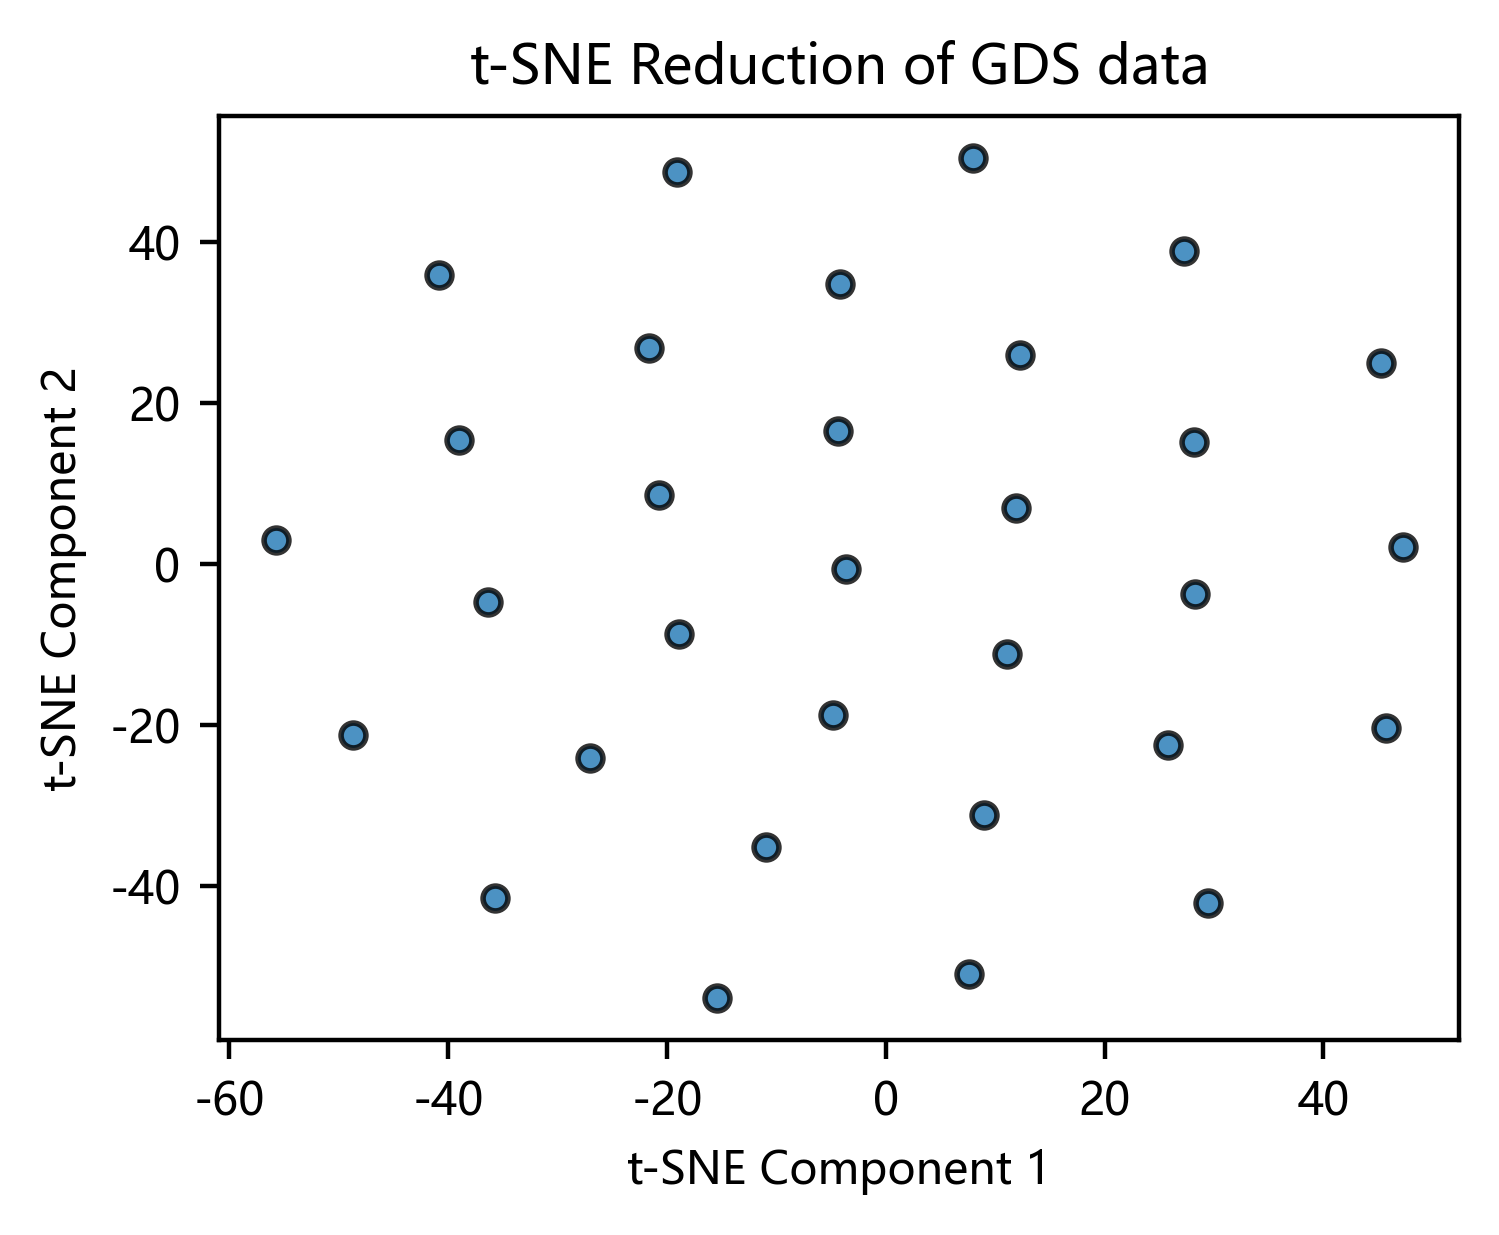

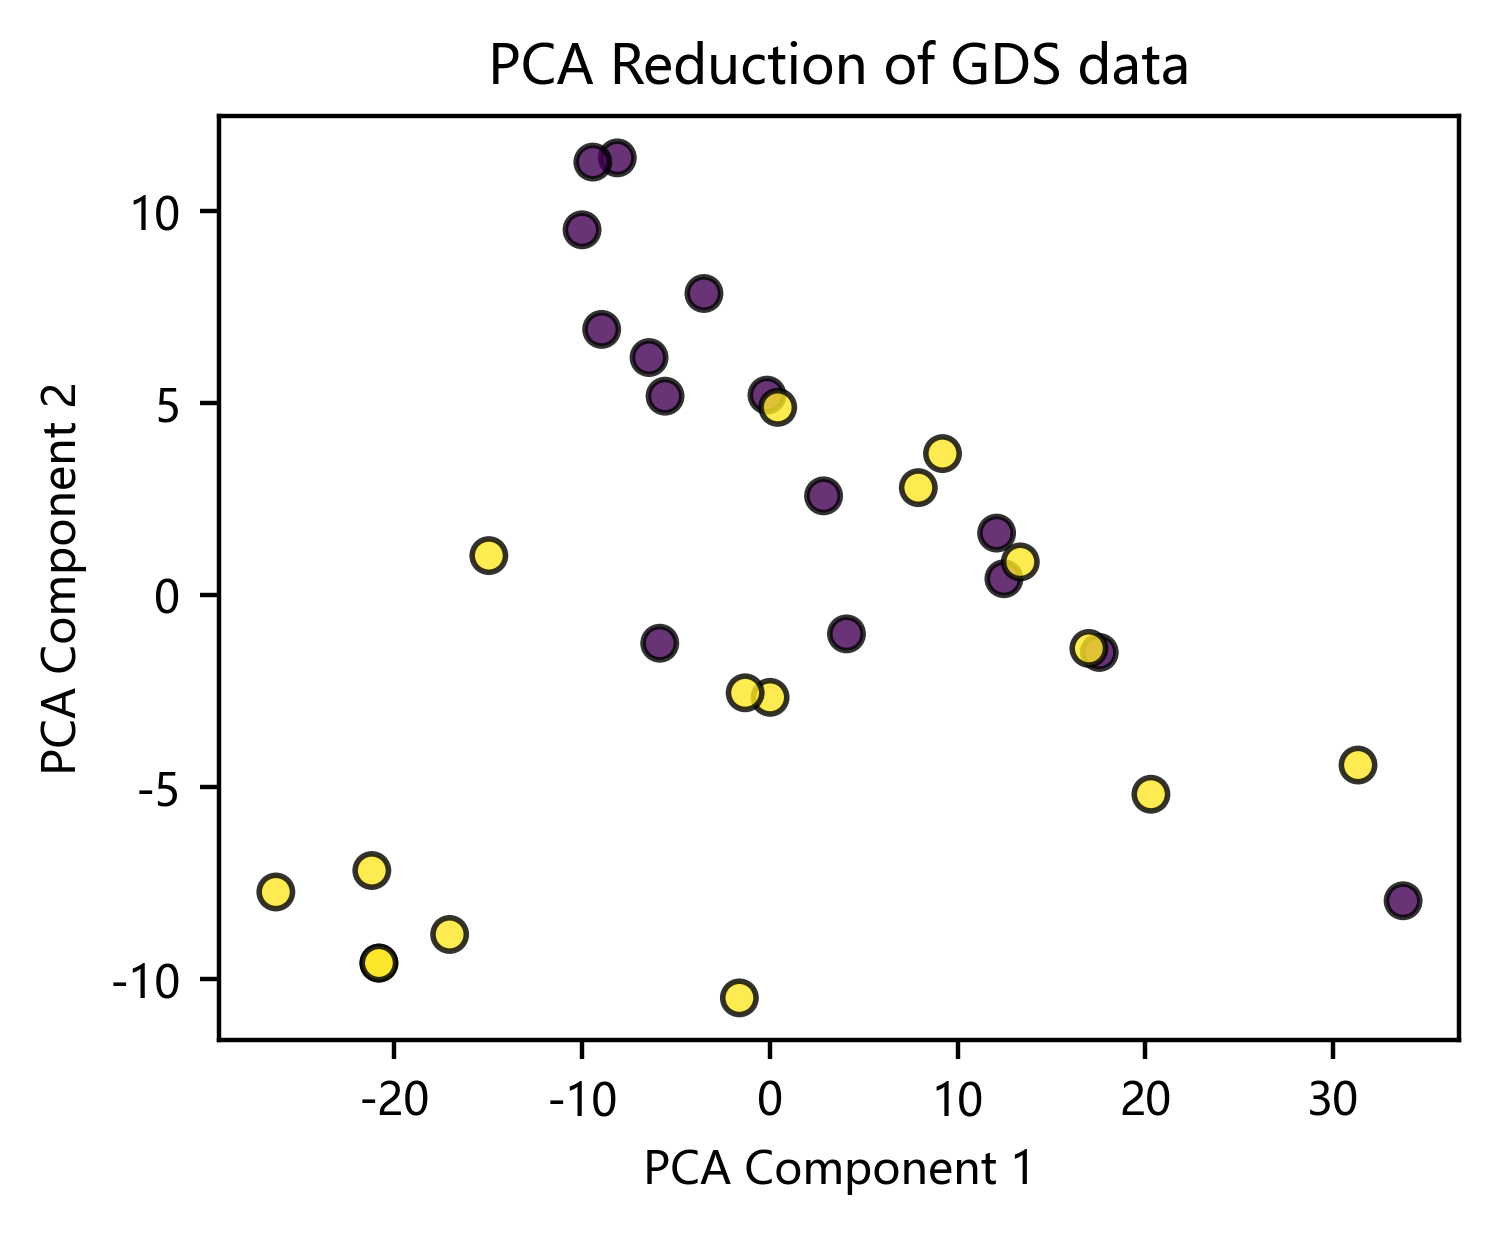

In [4]:
import matplotlib.pyplot as plt 
import pydotplus
from sklearn import metrics
import pandas as pd
import joblib
import numpy as np
import os 
import shutil
plt.rcParams['font.sans-serif']=['Microsoft YaHei']  # 汉字字体集
plt.rcParams['font.size'] = 8  # 字体大小
plt.rcParams['axes.unicode_minus'] = False

data_excel='predict.xlsx'
data_name='GDS'  # 数据集用表格的哪一个表单，表单应当为 data_XX的形式，XX为data_name
label_name='GDS' # 数据集标签的名称
sheet_name=f'{data_name}_data'
data=pd.read_excel(data_excel,sheet_name=sheet_name)
data=data.fillna(0)

size_threshold=1.5

feature_names=['cC','cO','cN','cF','cP','cS','OCr','FCr','FOr','PCr','NCr',
               'SCr','NFr','POr','NOr','SOr','PFr','SFr','SPr','NSr','FNS/Or',
               'FP/Or','FNS/FPr']
data_features_part=data[feature_names]

from sklearn.decomposition import PCA


from sklearn.manifold import TSNE

# 载入手写数字数据集
X=data_features_part
y=np.array([1 if x>size_threshold else 0 for x in data[label_name]])  # 把原来的GWD根据阈值划分为两类，其中0表示较小值，1表示较大值
print('y.shape',len(y),'\n','y[0].shape',type(y[0]),y)
# 使用 t-SNE 进行降维
# tsne = TSNE(n_components=2, random_state=42,method='exact')
tsne=TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

# 可视化降维结果
plt.figure(figsize=(4, 3),dpi=400)
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], cmap='viridis', edgecolors='k', alpha=0.8,s=20)
plt.title('t-SNE Reduction of GDS data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')


def show_every_data(ls):
    for i in ls:
        print(i)
    return 
print('t-SNE_component1:')
show_every_data(X_tsne[:,0])
print('t-SNE_component2:')
show_every_data(X_tsne[:,1])
# 添加颜色条
# legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
# plt.gca().add_artist(legend1)

plt.show()
# plt.savefig('GDS——results TSNE.jpg')


#PCA
pca= PCA(n_components=2, random_state=0)
X_pca = pca.fit_transform(X)

# 可视化降维结果
plt.figure(figsize=(4, 3),dpi=400)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1],c=y, cmap='viridis', edgecolors='k', alpha=0.8)
plt.title('PCA Reduction of GDS data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')


# 添加颜色条
# legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
# plt.gca().add_artist(legend1)

plt.show()




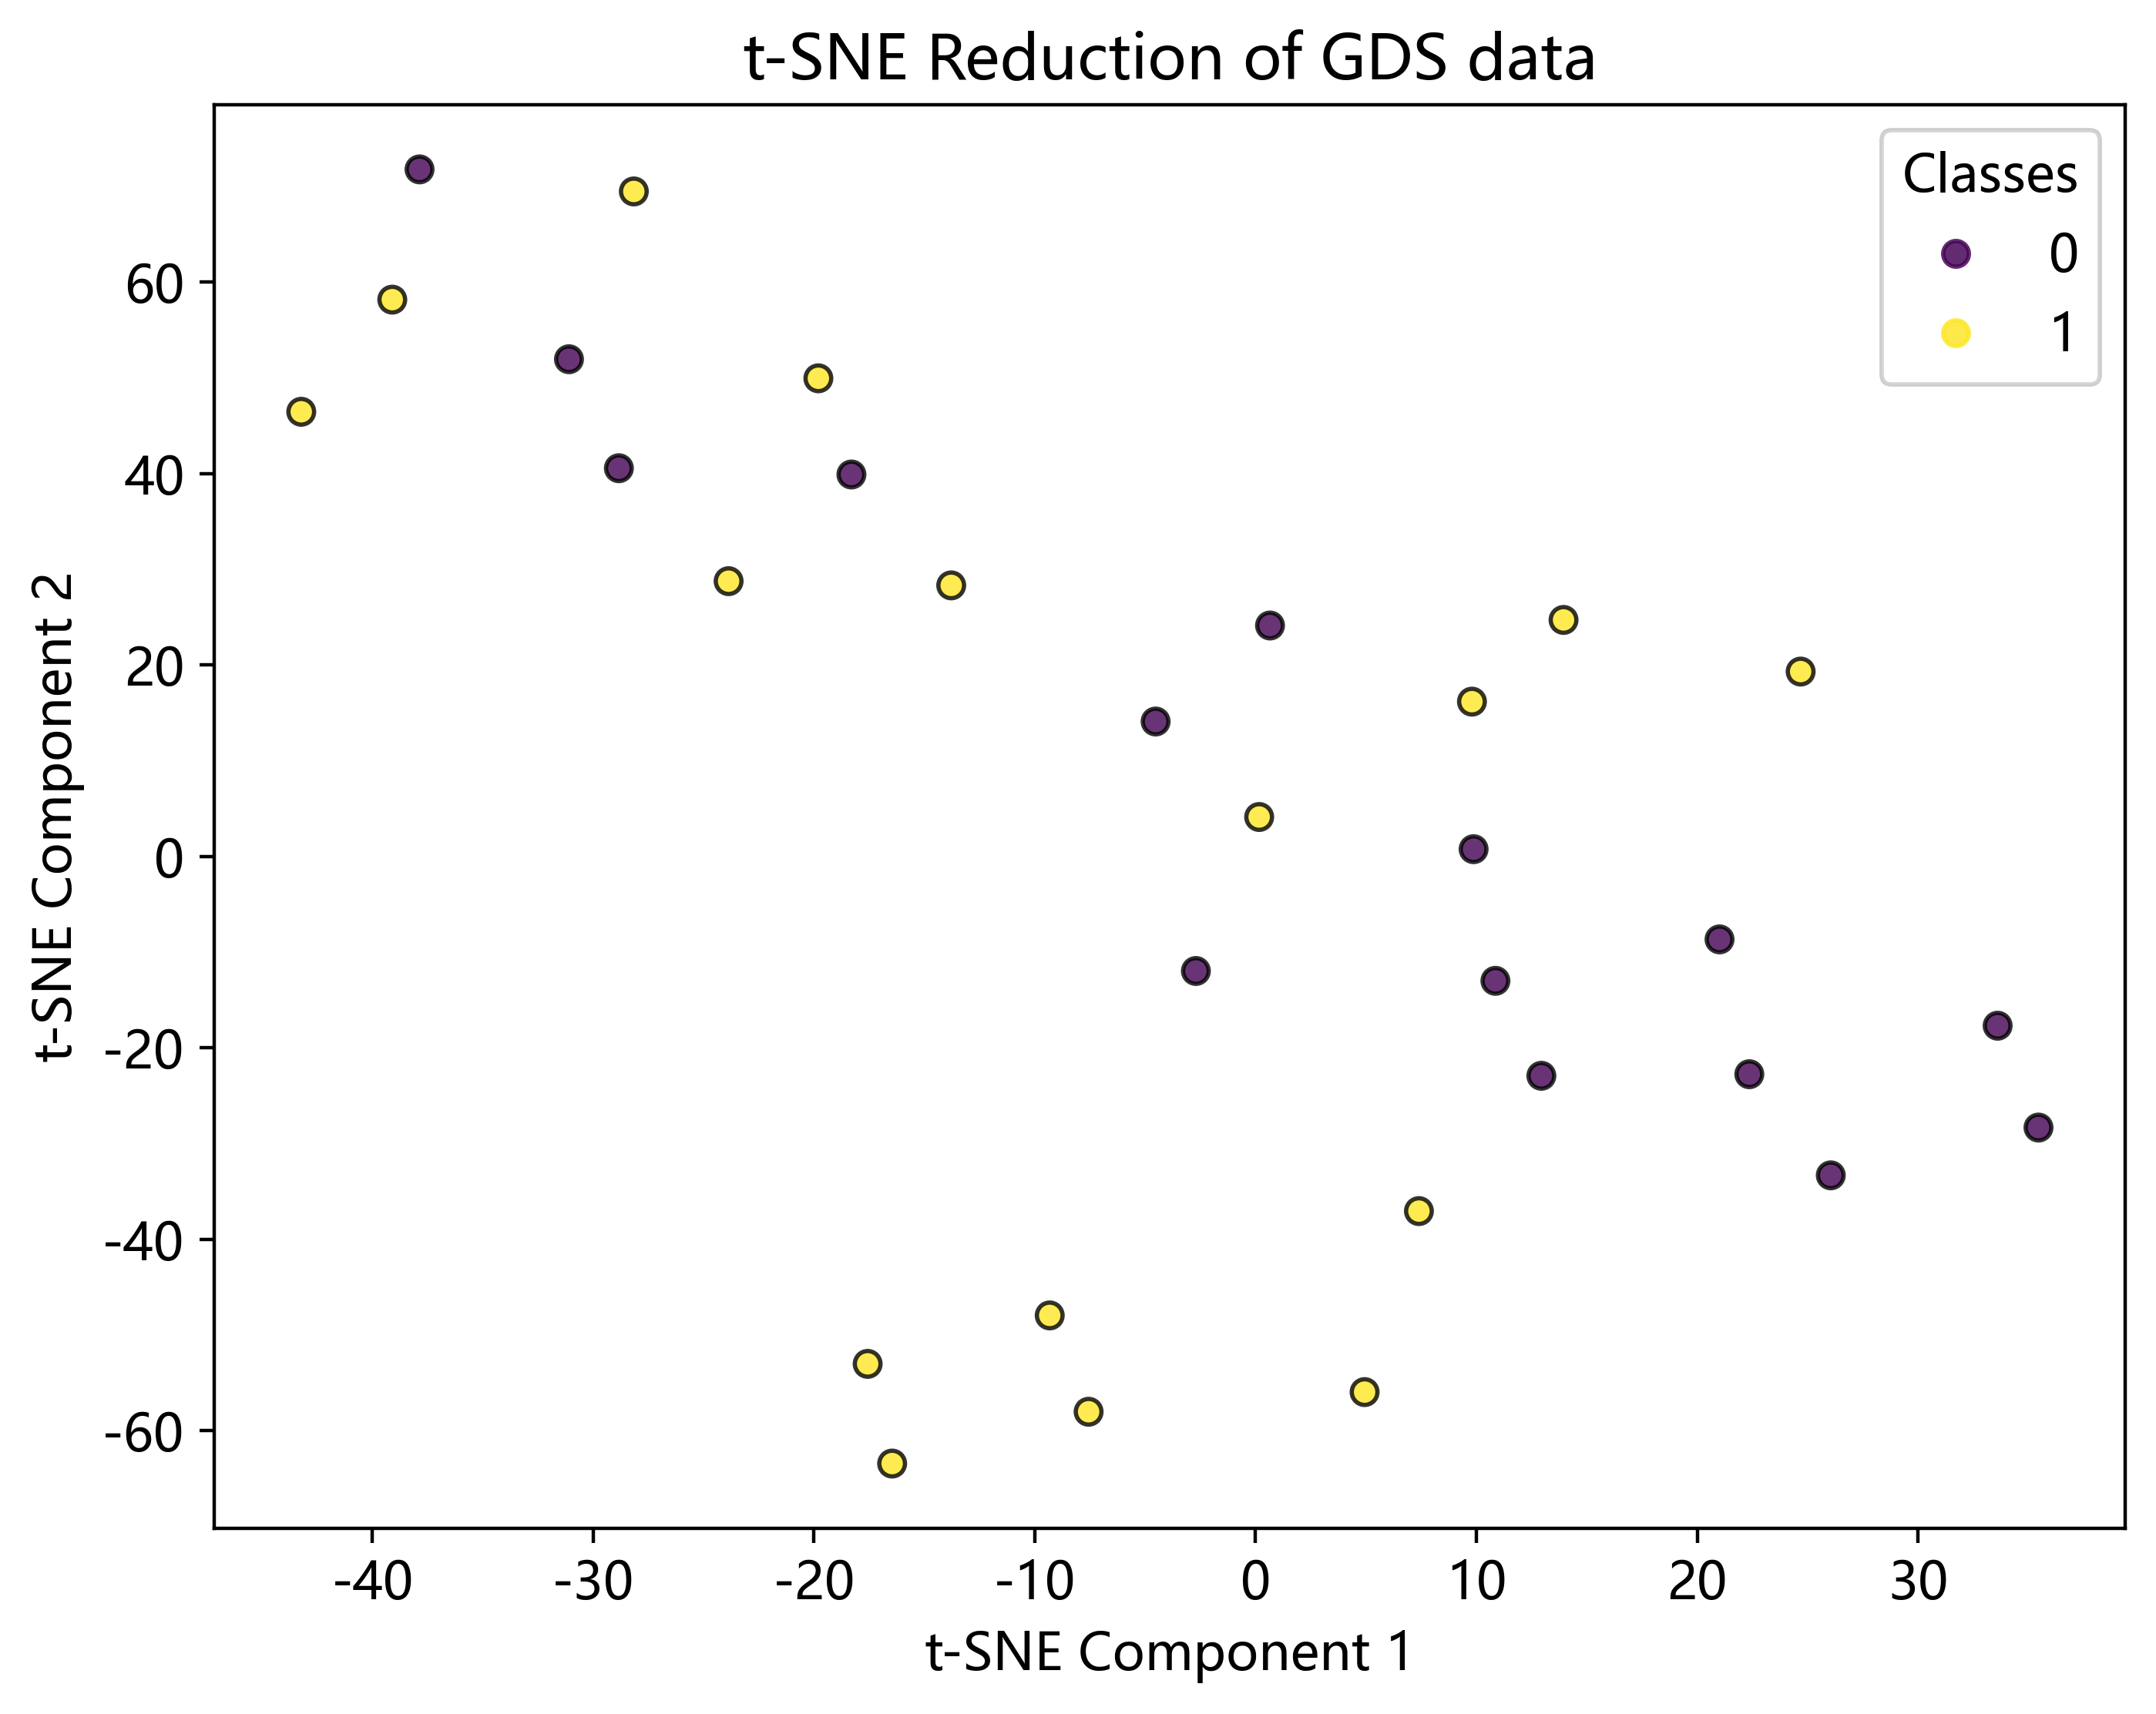

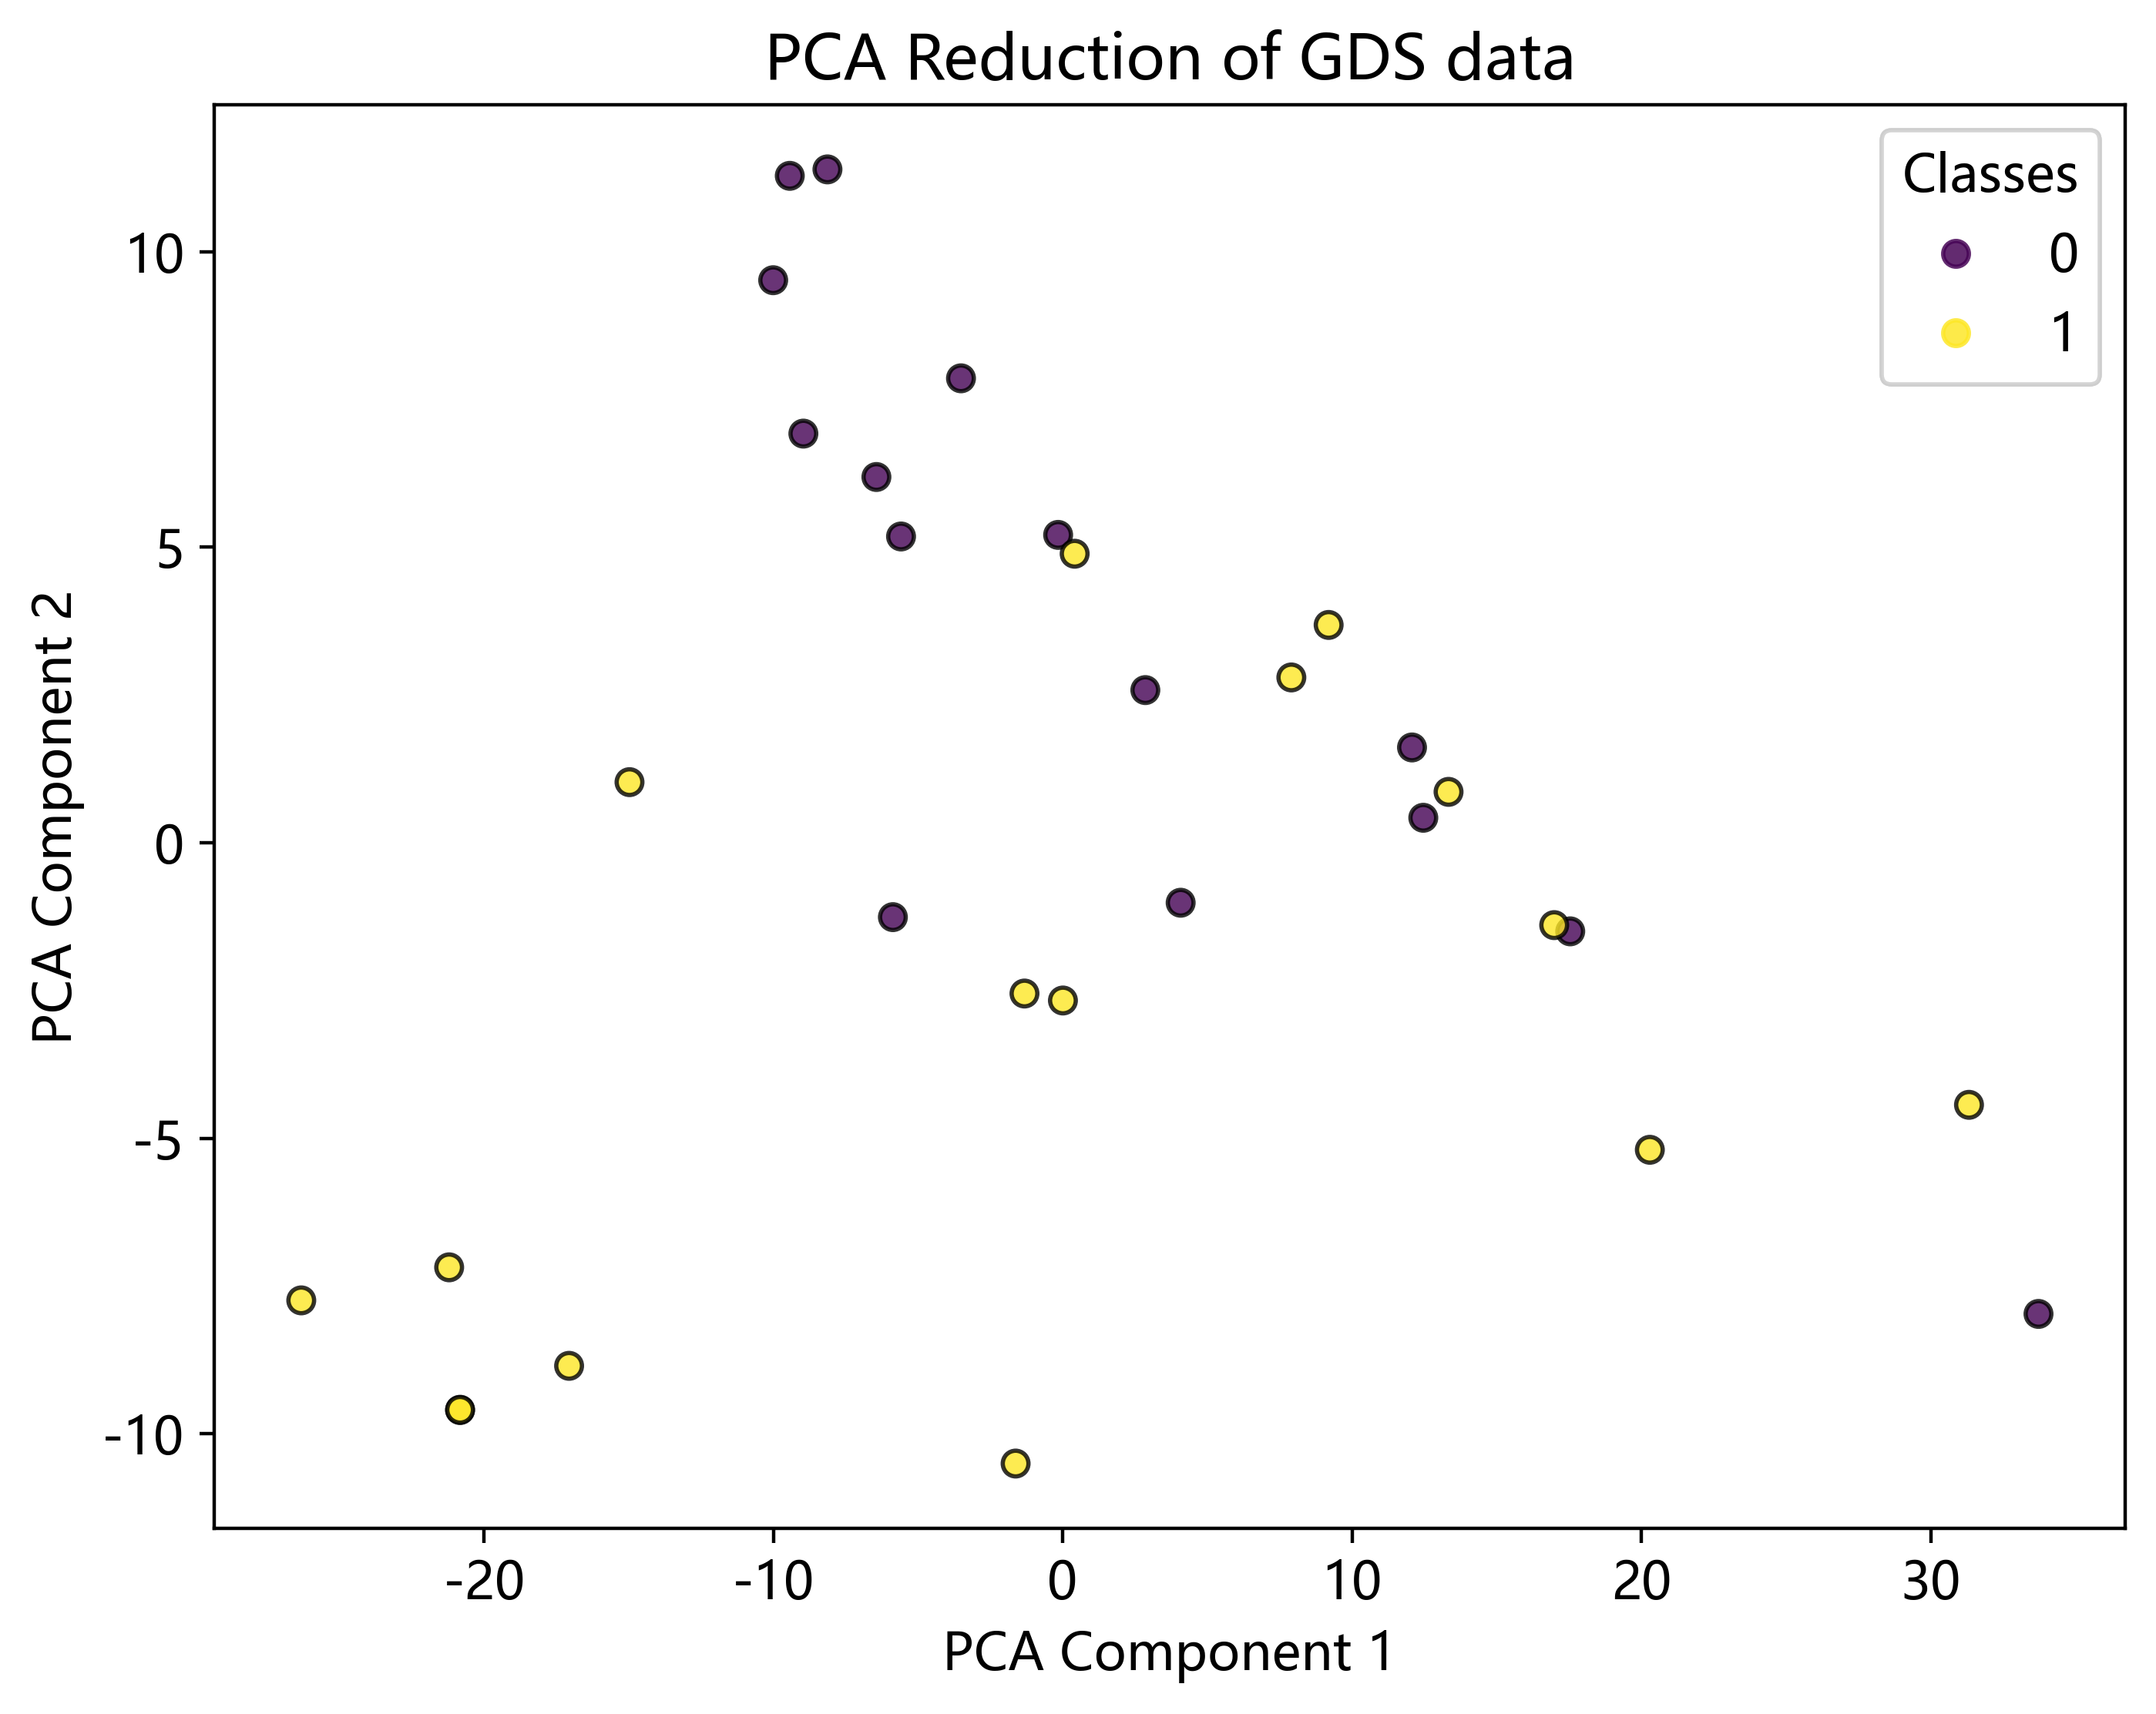

In [27]:
(?)# 第二类GDS的预测

import matplotlib.pyplot as plt 
import pydotplus
from sklearn import metrics

import joblib
import os 
import shutil
plt.rcParams['font.sans-serif']=['Microsoft YaHei']  # 汉字字体集
plt.rcParams['font.size'] = 12  # 字体大小
plt.rcParams['axes.unicode_minus'] = False

data_excel='predict.xlsx'
data_name='GDS'  # 数据集用表格的哪一个表单，表单应当为 data_XX的形式，XX为data_name
label_name='GDS' # 数据集标签的名称
sheet_name=f'{data_name}_data'
data=pd.read_excel(data_excel,sheet_name=sheet_name)
data=data.fillna(0)

size_threshold=1.5

feature_names=['cC','cO','cN','cF','cP','cS','OCr','FCr','FOr','PCr','NCr',
               'SCr','NFr','POr','NOr','SOr','PFr','SFr','SPr','NSr','FNS/Or',
               'FP/Or','FNS/FPr']
data_features_part=data[feature_names]

from sklearn.decomposition import PCA


from sklearn.manifold import TSNE

# 载入手写数字数据集
X=data_features_part
y=np.array([1 if x>size_threshold else 0 for x in data[label_name]])  # 把原来的GWD根据阈值划分为两类，其中0表示较小值，1表示较大值
# print('y.shape',len(y),'\n','y[0].shape',type(y[0]),y)
# 使用 t-SNE 进行降维
# tsne = TSNE(n_components=2, random_state=42,method='exact')
tsne=TSNE(n_components=2,method='exact',random_state=12,perplexity=10)
X_tsne = tsne.fit_transform(X)

# 可视化降维结果
plt.figure(figsize=(8, 6),dpi=400)
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1],c=y, cmap='viridis', edgecolors='k', alpha=0.8)
plt.title('t-SNE Reduction of GDS data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

# 添加颜色条
legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
plt.gca().add_artist(legend1)

plt.show()
# plt.savefig('GDS——results TSNE.jpg')


#PCA
pca= PCA(n_components=2, random_state=0)
X_pca = pca.fit_transform(X)

# 可视化降维结果
plt.figure(figsize=(8, 6),dpi=400)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1],c=y, cmap='viridis', edgecolors='k', alpha=0.8)
plt.title('PCA Reduction of GDS data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# 添加颜色条
legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
plt.gca().add_artist(legend1)

plt.show()




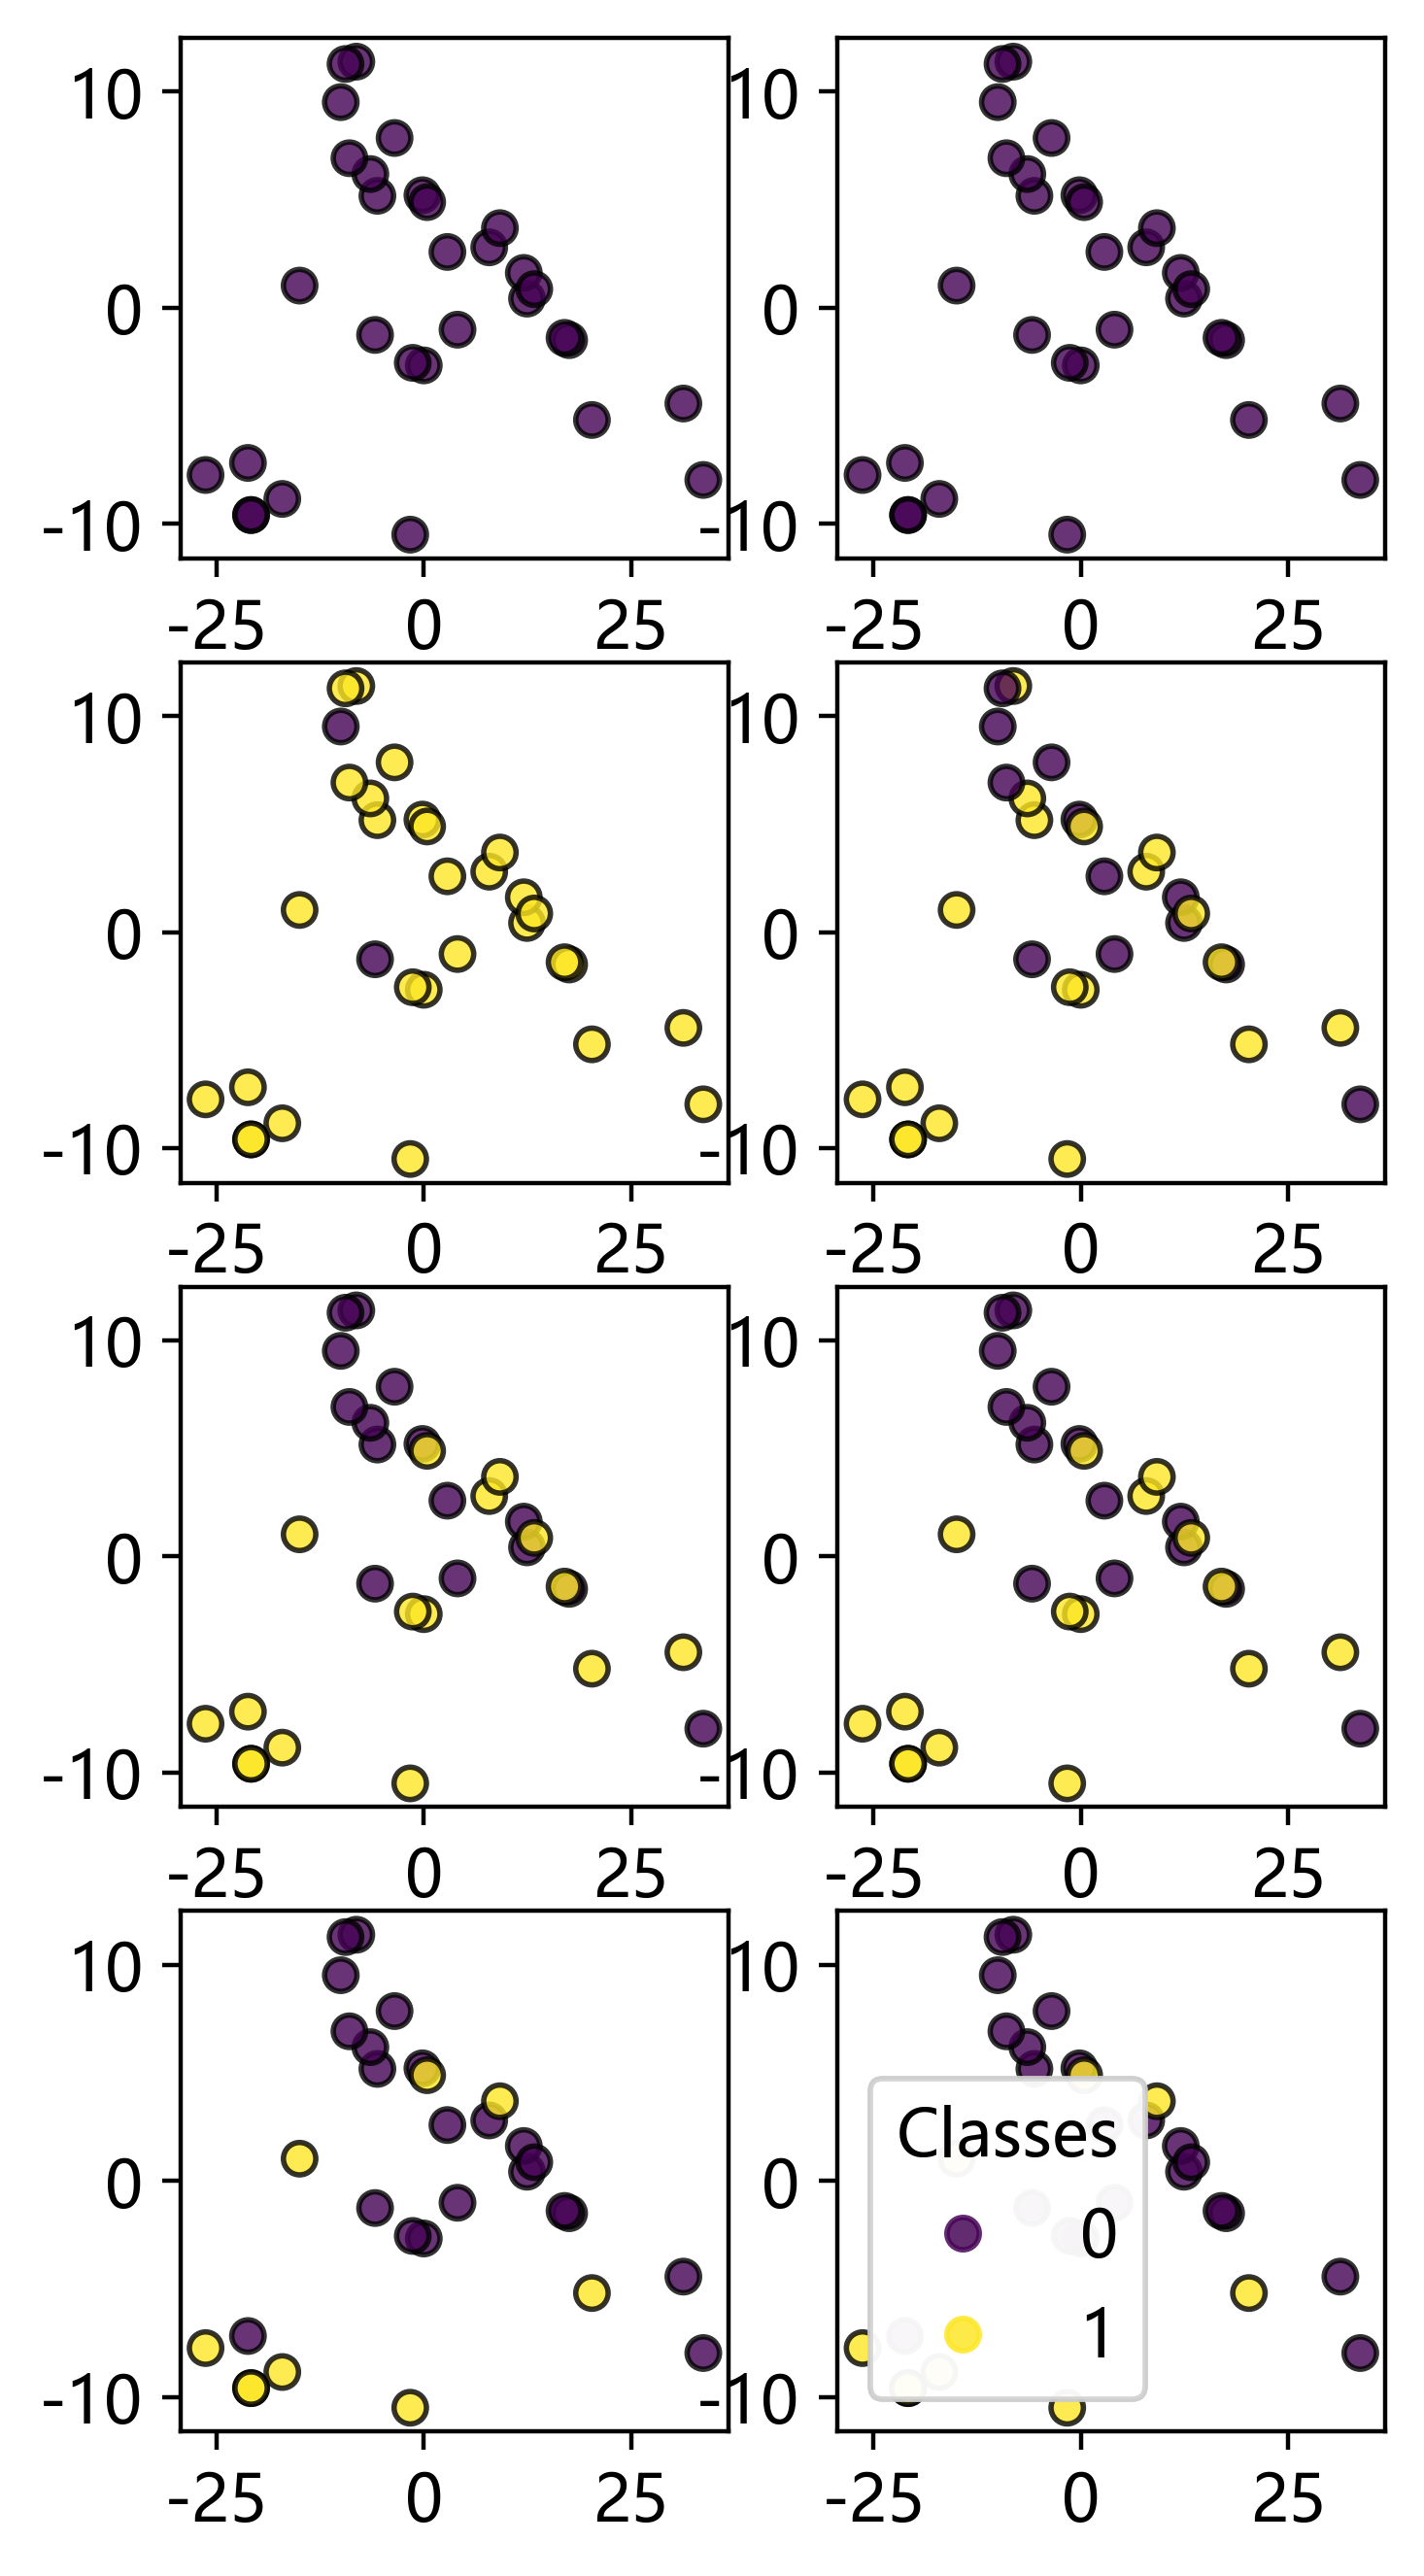

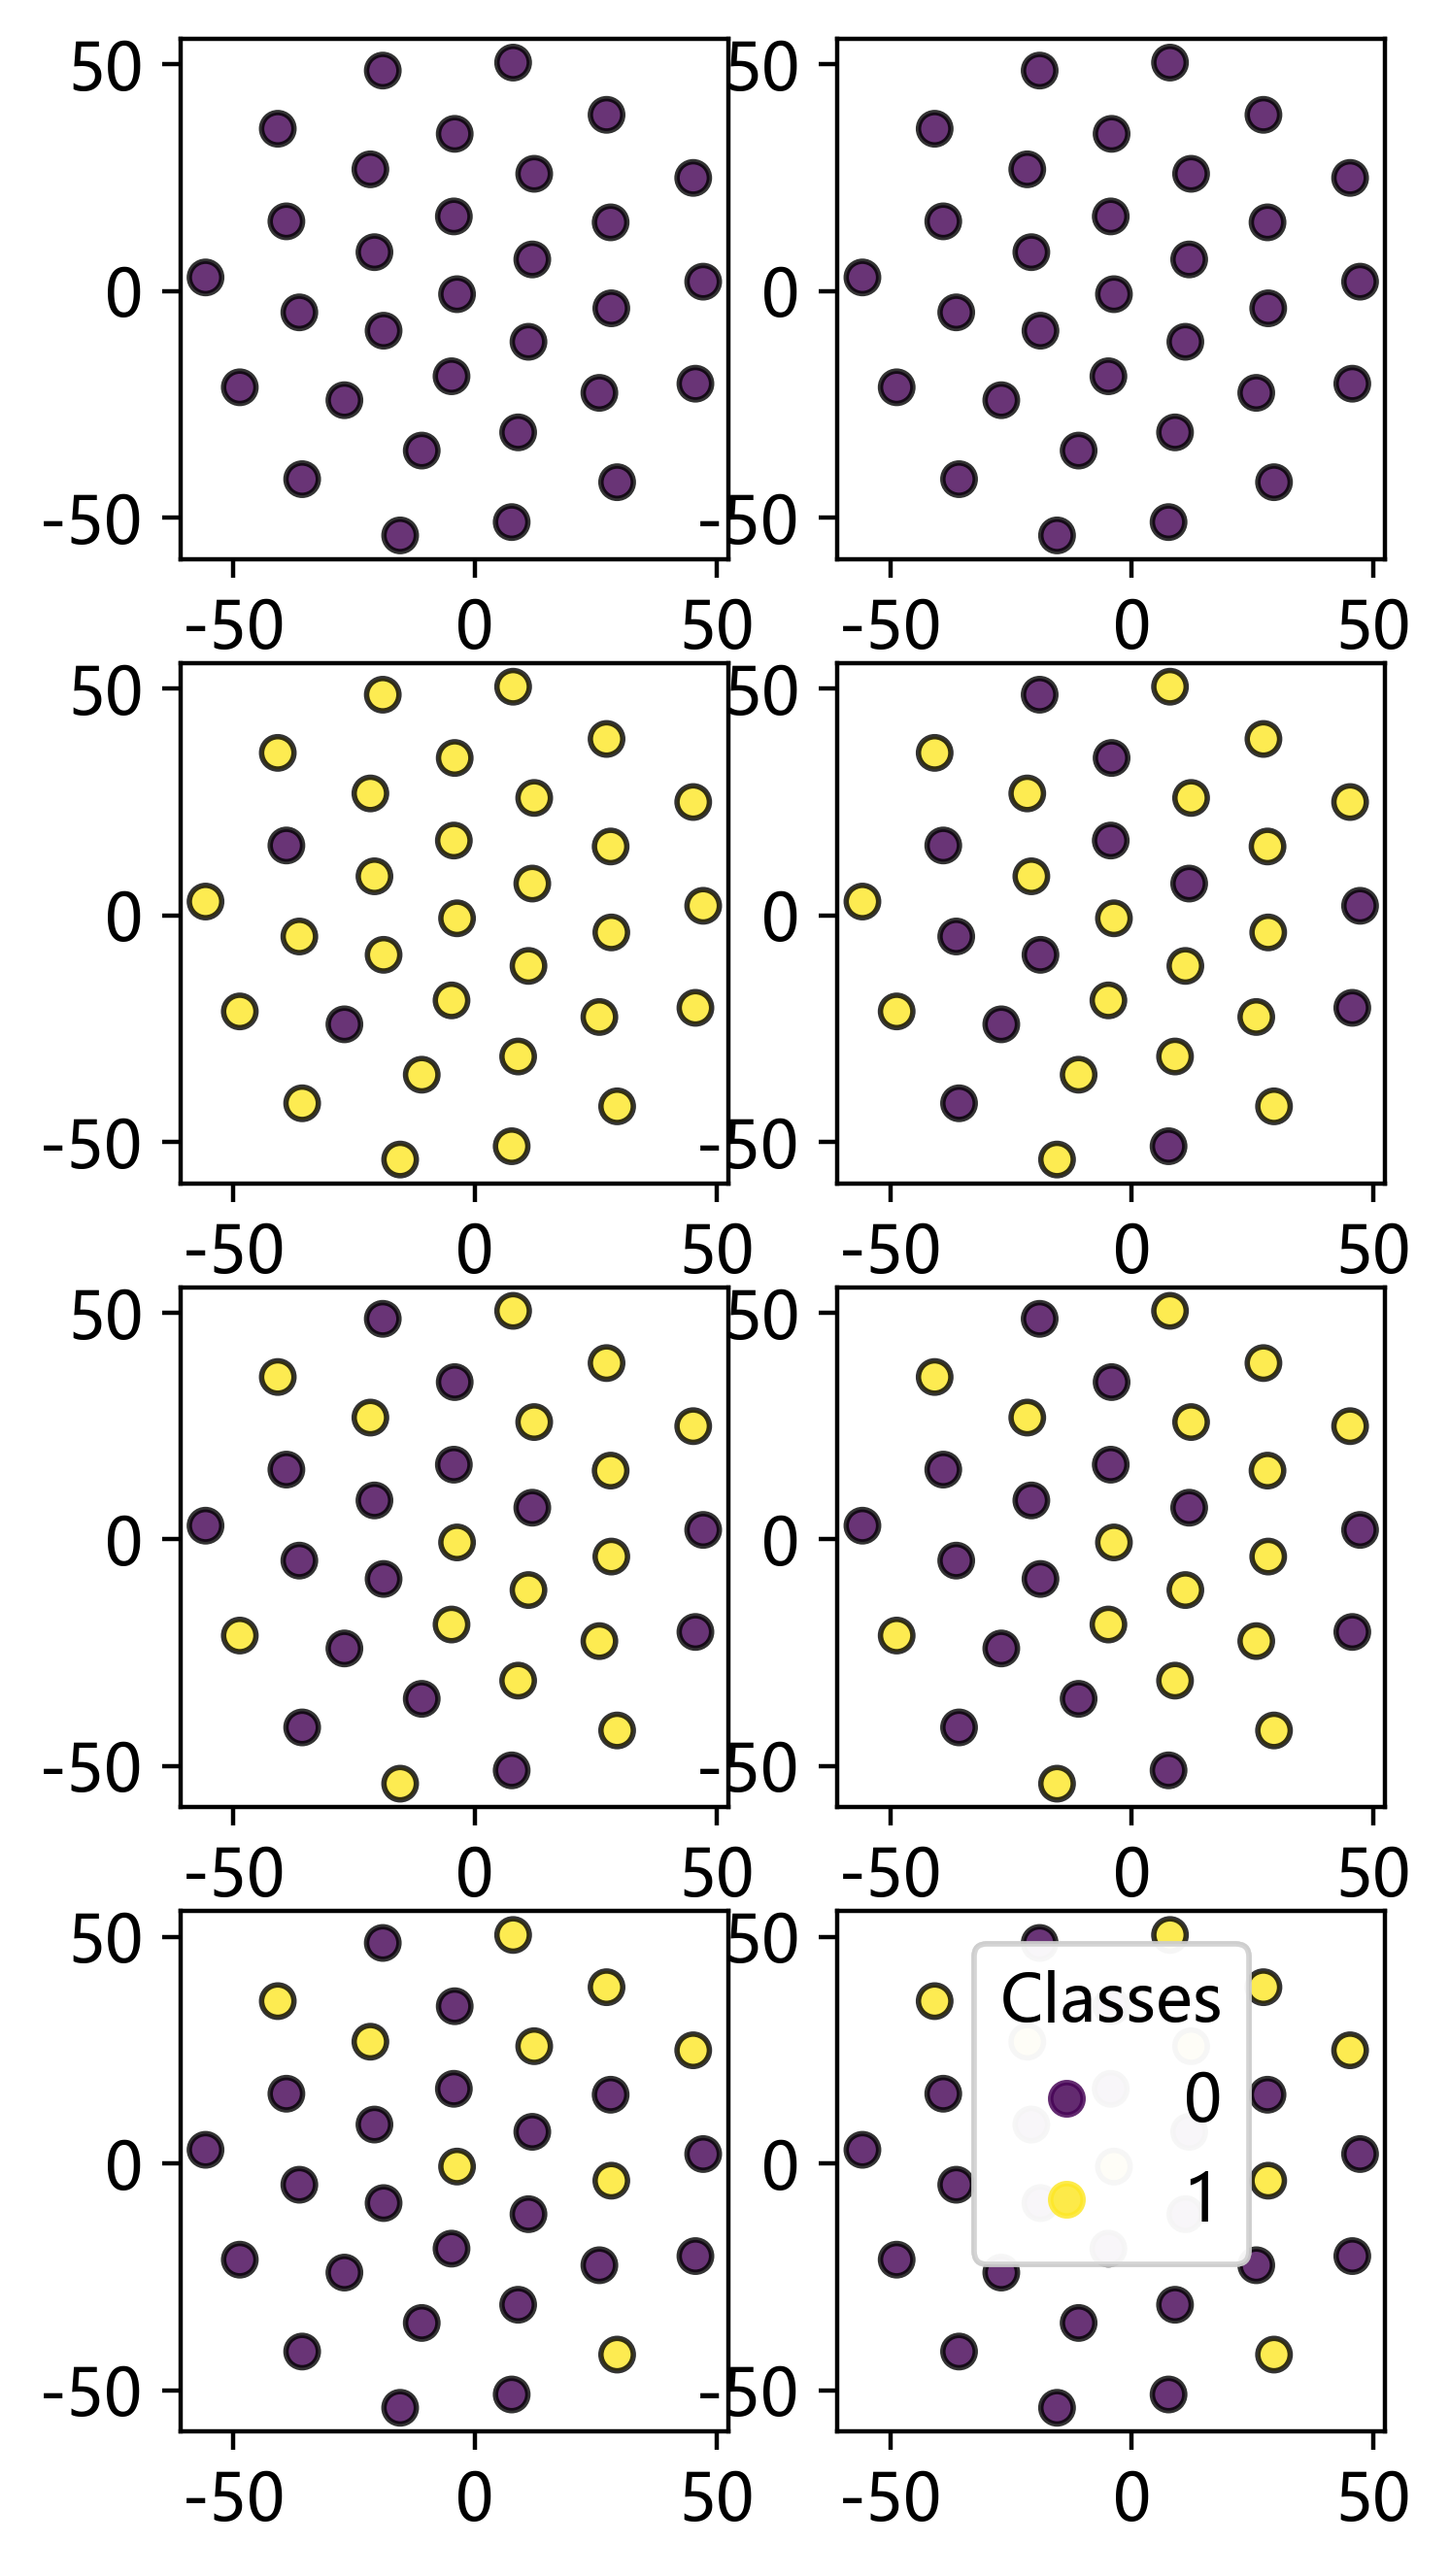

In [13]:

#不同参数值的对比
import matplotlib.pyplot as plt 
import pydotplus
from sklearn import metrics
import numpy as np
import joblib
import os 
import shutil
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

plt.rcParams['axes.unicode_minus'] = False

data_excel='predict.xlsx'
data_name='GDS'  # 数据集用表格的哪一个表单，表单应当为 data_XX的形式，XX为data_name
label_name='GDS' # 数据集标签的名称
sheet_name=f'{data_name}_data'
data=pd.read_excel(data_excel,sheet_name=sheet_name)
data=data.fillna(0)

feature_names=['cC','cO','cN','cF','cP','cS','OCr','FCr','FOr','PCr','NCr',
               'SCr','NFr','POr','NOr','SOr','PFr','SFr','SPr','NSr','FNS/Or',
               'FP/Or','FNS/FPr']
X=data[feature_names]

tsne = TSNE(n_components=2, random_state=2)
pca=PCA(n_components=2,random_state=2)

def draw(X,reduction='pca',label_name=None):
# PCA主成分分析结果
    plt.figure(figsize=(4,8),dpi=400)
    plt.title(f'{reduction} Reduction of {label_name}')
    plt.xlabel(f'{reduction} Component 1')
    plt.ylabel(f'{reduction} Component 2')
    for i in range(8):
        size_threshold=0.3*(i+1)
        y=pd.DataFrame([1 if x>size_threshold else 0 for x in data[label_name]])  # 把原来的GWD根据阈值划分为两类，其中0表示较小值，1表示较大
        # print('y.shape',len(y),'\n','y[0].shape',type(y[0]),y)
    # 使用 t-SNE 进行降维
        if reduction=='pca':
            X_reduced =pca.fit_transform(X)
        if reduction=='tsne':
            X_reduced= tsne.fit_transform(X)
        plt.subplot(4,2,i+1)
        scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1],c=y, cmap='viridis', edgecolors='k', alpha=0.8)
        if label_name==None:
            label_name=Data

    legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
    plt.gca().add_artist(legend1)

    plt.show()
# plt.savefig('GDS——results TSNE.jpg')


draw(X,reduction='pca',label_name='GDS')
draw(X,reduction='tsne',label_name='GDS')


